In [49]:
# Loading the libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataframe 

telecom=pd.read_csv('telecom_churn.csv')

In [4]:
# To view entire data 

pd.set_option('display.max_columns',50)

In [5]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Removing CustomerID as it is clearly a dimension with no value for itself and is just an identitiy of each customer

telecom.drop('customerID',axis=1,inplace=True)

In [11]:
# To see how many rows and columns the data has 

telecom.shape

(7043, 20)

In [12]:
# To see the basic data types of each column

telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


From the above we can see that total charges is dispalyed as objects whereas it is a integer.

So we are converting it to a numeric column.

In [13]:
telecom.TotalCharges = pd.to_numeric(telecom.TotalCharges, errors='coerce')

In [14]:
# Checking whethere there is a null value in the data 

telecom.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that total charges has eleven NaN values.
Since we have around 7000 records we can remove the null values.

In [15]:
# Removing the null values 

telecom.dropna(inplace=True)

In [16]:
# Converting the String churn column in to binary by replacing Yes with 1 and No with 0

telecom['Churn'].replace("Yes",1,inplace=True)
telecom['Churn'].replace("No",0,inplace=True)


In [18]:
# Converting the categorical columns in to binary using get dummies

telecom_complete=pd.get_dummies(telecom)
telecom_complete.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


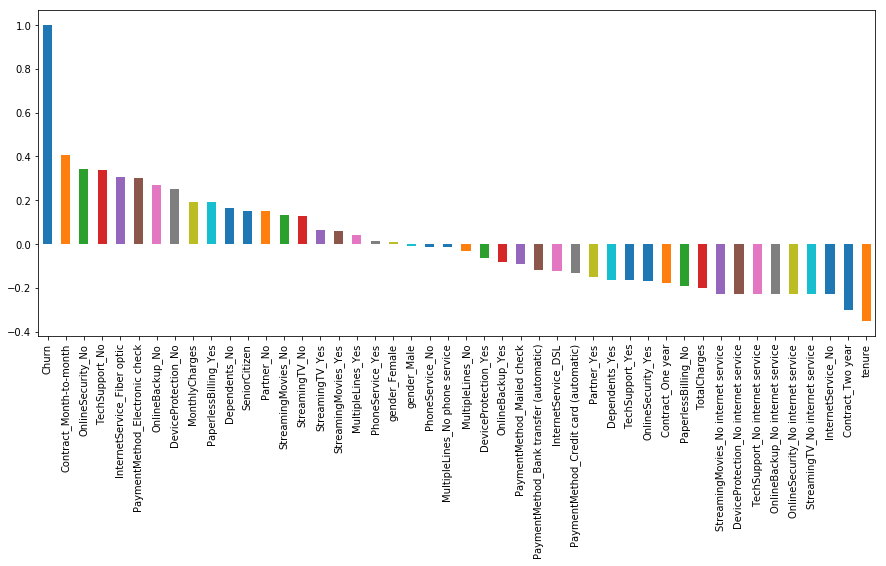

In [21]:
plt.figure(figsize=(15,6))
telecom_complete.corr()['Churn'].sort_values(ascending=False).plot.bar()

We can see that month to month contract and absence of Online Security and Tech support is strongly positively correlated with the traget variable Churn and we also got the same info while doing visual anlaysis of the data in Tableau. 

Also we can see that Tenure and Two Year contract is negatively correlated with target variable Churn. 

With basic Visual Analytics done in Tableau and Basic Exploration done here we are heading to model building and evaluation.

# Validation Dataset

We will use 80% of the dataset for modeling and hold back 20% for Test/Validation.

In [36]:
# Split-out validation dataset
x = telecom_complete.drop('Churn',axis=1)
y = telecom_complete['Churn']
validation_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

# Evaluating Baseline Models 

We are going to make simple kfold cross validation accross models and see what works the best for the data.

In [34]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this classification problem. The algorithms selected include:
1. Linear Algorithms: Logistic Regression (LR)
2. Nonlinear Algorithms: Classiffication and Regression Trees (CART),k-Nearest Neighbors (KNN),Naive Bayes and Support Vector Classifier (SVC)

We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms. 

Let's evaluate the  algorithms with a standardized copy of the dataset. 

This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. 

We also need to avoid data leakage when we transform the data. 

A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross-validation test harness. 

That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [37]:
# Standardize the dataset
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('CART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('SVC', Pipeline([('Scaler', StandardScaler()), ('SVC', SVC())])))

In [38]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.805157 (0.014918)
KNN: 0.757325 (0.018336)
CART: 0.734399 (0.012112)
NB: 0.695824 (0.013457)
SVC: 0.799288 (0.014990)


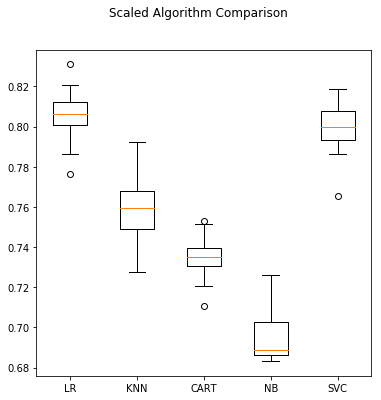

In [39]:
# Compare Algorithms
fig = plt.figure(figsize=(6,6))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Logistic Regression and SVC has the best accuracy with minimum standard deviation. 

Lets see whethere we can improve the same with tuning.

# Improve Results With Tuning

In [60]:
# SVC tuning 
scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
scaledtest=scaler.transform(x_test)

c_values = np.arange(1,10)
kernel=['linear','rbf']
param_grid = dict(C=c_values,kernel=kernel)
model_svc=SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid_svc = GridSearchCV(estimator=model_svc, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result_svc = grid_svc.fit(scaledx, y_train)

In [61]:
grid_result_svc.score(scaledx,y_train)

0.8030222222222222

With Tuning the accuracy of SVC is increased by 4%.

Now we will check the test score.

In [62]:
grid_result_svc.score(scaledtest,y_test)

0.7924662402274343

The model is almost a perfect fit.

In [63]:
# DT Tuning 

scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
scaledtest=scaler.transform(x_test)

max_depth= np.arange(1,8)
max_features=np.arange(1,45)
min_samples_split=np.arange(2,6)
param_grid = dict(max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split)
model_dt=DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result_dt = grid_dt.fit(scaledx, y_train)

In [64]:
grid_result_dt.score(scaledx,y_train)

0.8012444444444444

The accuracy is improved by 6.7 % but still it is lower than SVC.

We will check the test score.

In [65]:
grid_result_dt.score(scaledtest,y_test)

0.7867803837953091

There is a slight over fit. 

In [70]:
# LR Tuning

scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
scaledtest=scaler.transform(x_test)

c_values = np.arange(2**-5,2**5)
param_grid = dict(C=c_values)
model_lr=LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result_lr = grid_lr.fit(scaledx, y_train)

In [71]:
grid_result_lr.score(scaledx,y_train)

0.8088888888888889

There isnt a much improvement in the score. 

We wil check the test score.

In [72]:
grid_result_lr.score(scaledtest,y_test)

0.8002842928216063

We can see that the model is in the sweet spot with perfect fit.

# Ensemble Methods

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. 

We will evaluate two different ensemble machine learning algorithms, one boosting and one bagging method:

1. Boosting Methods: AdaBoost (AB),GradientBoost (GB)
2. Bagging Methods: Random Forests (RF), Bagging (BG)

In [73]:
# ensembles
ensembles = []
ensembles.append(('AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('GB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingClassifier())])))
ensembles.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('Bag', Pipeline([('Scaler', StandardScaler()),('Bag', BaggingClassifier())])))

In [74]:
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.801245 (0.014557)
GB: 0.801602 (0.012662)
RF: 0.777418 (0.021282)
Bag: 0.775822 (0.014450)


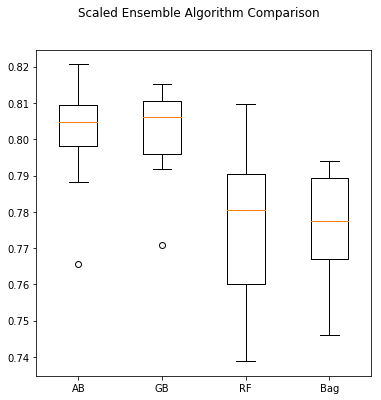

In [76]:
# Compare Algorithms
fig = plt.figure(figsize=(6,6))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Adaboost and GradientBoost ensemble gives the best results.

We will try imporvingg the score further by tuning. 

In [80]:
# Adaboost Tuning 

scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
scaledtest=scaler.transform(x_test)
base_estimator=[LogisticRegression(C=6.03125, class_weight=None, dual=False,
                fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)]
n_estimators=np.arange(1,51)
param_grid = dict(base_estimator=base_estimator,n_estimators=n_estimators)
model_ab=AdaBoostClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid_ab = GridSearchCV(estimator=model_ab, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result_ab = grid_ab.fit(scaledx, y_train)

In [81]:
grid_ab.score(scaledx,y_train)

0.8055111111111111

There is a slight increase of 0.4 %. 

In [82]:
grid_ab.score(scaledtest,y_test)

0.7974413646055437

Model is almost perfect fit. 

In [83]:
# GradientBoost Tuning 

scaler = StandardScaler().fit(x_train)
scaledx = scaler.transform(x_train)
scaledtest=scaler.transform(x_test)


n_estimators=np.arange(1,101)
param_grid = dict(n_estimators=n_estimators)
model_gb=GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid_gb = GridSearchCV(estimator=model_ab, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result_gb = grid_gb.fit(scaledx, y_train)

In [84]:
grid_gb.score(scaledx, y_train)

0.8081777777777778

There is 0.7% increase in the accuracy. 

In [86]:
grid_gb.score(scaledtest, y_test)

0.7995735607675906

Model is at the right fit. 

In [89]:
results=pd.DataFrame(index=['Logistic Regression',
                            'Decision Tree','Support Vector Classifier',
                            'Adaboost Classifier','Gradientboost Classifier'])

In [90]:
results['Train']=[grid_result_lr.score(scaledx,y_train),
                  grid_result_dt.score(scaledx,y_train),
                  grid_result_svc.score(scaledx,y_train),
                  grid_result_ab.score(scaledx,y_train),
                  grid_result_gb.score(scaledx,y_train)]

In [91]:
results['Test']=[grid_result_lr.score(scaledtest,y_test),
                  grid_result_dt.score(scaledtest,y_test),
                  grid_result_svc.score(scaledtest,y_test),
                  grid_result_ab.score(scaledtest,y_test),
                  grid_result_gb.score(scaledtest,y_test)]

In [92]:
results

,Train,Test
Logistic Regression,0.808889,0.800284
Decision Tree,0.801244,0.786780
Support Vector Classifier,0.803022,0.792466
Adaboost Classifier,0.805511,0.797441
Gradientboost Classifier,0.808178,0.799574
